In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
data=pd.read_csv('C:\\Users\\Admin\\excel\\Social_Network_Ads.csv')

In [5]:
data.head(10)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


In [7]:
data.tail(5)

,Age,EstimatedSalary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [11]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [15]:
data.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [17]:
data.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


<Axes: >

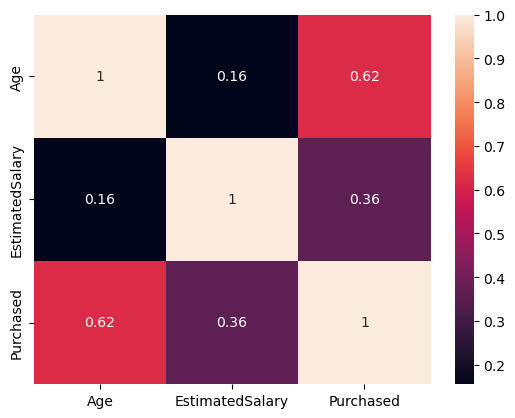

In [19]:
sns.heatmap(data.corr(),annot=True)

<Axes: ylabel='Age'>

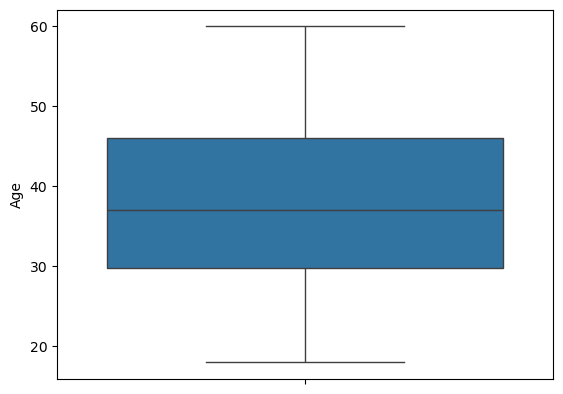

In [25]:
sns.boxplot(data['Age'])

<Axes: ylabel='EstimatedSalary'>

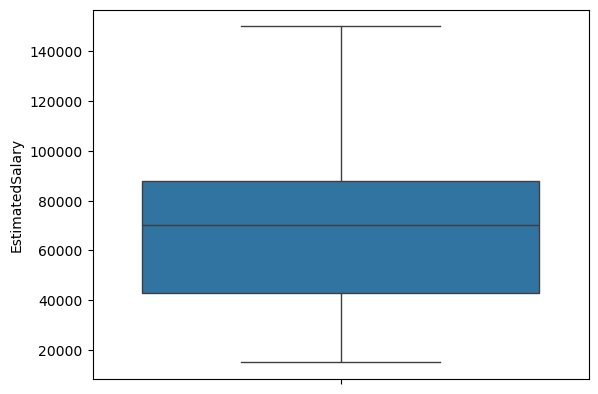

In [27]:
sns.boxplot(data['EstimatedSalary'])

In [111]:
X=data.drop(['Purchased'],axis=1)
y=data['Purchased']

In [113]:
from sklearn.model_selection import train_test_split
X_train,y_train,X_test,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [115]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=15)
rf.fit(X,y)

RandomForestRegressor(n_estimators=15)

In [117]:
y_pred=rf.predict(X)

In [119]:
y_pred

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 1.        , 1.        , 1.        ,
       0.86666667, 0.8       , 0.93333333, 0.86666667, 0.86666667,
       0.86666667, 1.        , 1.        , 0.        , 0.        ,
       0.        , 0.93333333, 0.        , 0.        , 0.06666667,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.93333333, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.5       ,
       0.        , 0.        , 0.        , 0.93333333, 0.46666667,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.13333333, 0.     

In [121]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [123]:
A=pd.concat([data,pd.DataFrame(y_pred,columns=['pred'])],axis=1)


In [125]:
A

,Age,EstimatedSalary,Purchased,pred
0,19,19000,0,0.000000
1,35,20000,0,0.000000
2,26,43000,0,0.000000
3,27,57000,0,0.000000
4,19,76000,0,0.000000
...,...,...,...,...
395,46,41000,1,0.933333
396,51,23000,1,1.000000
397,50,20000,1,1.000000
398,36,33000,0,0.000000


In [127]:
from sklearn.metrics import r2_score

In [129]:
r2_score(y,y_pred)

0.9256166036970188

In [131]:
print(X_train.shape,y_train.shape)

(320, 2) (80, 2)


In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)

(320, 2) (320,)


In [138]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=15)

In [142]:
y_pred=np.matrix.round(rf.predict(X_test))

In [144]:
y_pred

array([1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0.])

In [148]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[46  6]
 [ 1 27]]


In [152]:
ac=accuracy_score(y_test,y_pred)
print('accuracy_score :',ac*100)

accuracy_score : 91.25
